In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import re
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns

이제 3가지 유형으로 빈 자리를 채우고  
1. 계단형
2. 직선형
3. spline
성능을 계산해보자

In [2]:
df = pd.read_csv('krxhynix.csv')

In [3]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
df.head()

,date,KRX_close,KRX_vol,KRX_change,hynix_close,hynix_vol,hynix_change
0,2006-01-02,"1,000.00","19,901,799",NaN,"37,600","13,366,196",6.52
1,2006-01-03,"1,012.36","23,519,159",NaN,"38,100","13,834,043",1.33
2,2006-01-04,"1,007.17","35,951,797",NaN,"35,300","23,140,068",-7.35
3,2006-01-05,991.68,"32,261,363",NaN,"34,600","21,566,179",-1.98
4,2006-01-06,"1,008.15","21,152,418",NaN,"35,050","12,707,206",1.30


In [6]:
krx = df[['date', 'KRX_change']]

In [5]:
linear = pd.read_csv('bloomberg_total_index2.csv')

In [7]:
# 필요 없는 column drop
linear.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
krx['date'] = pd.to_datetime(krx['date'])
linear['date'] = pd.to_datetime(linear['date'])

/Users/mokpolar/opt/anaconda3/envs/tf-py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df = pd.merge(krx, linear, how = 'left', on = 'date')

In [10]:
df.to_csv('bloomberg_for_linear_daily.csv')

In [11]:
df['KRX_change'] = df['KRX_change'].map(lambda x: '' if str(x) == 'nan' else x)
df['KRX_change'] = df['KRX_change'].map(lambda x: re.sub(",", "", str(x)))
df['KRX_change'] = pd.to_numeric(df['KRX_change'] )

In [12]:
# date 빼고 다 numeric type으로 만들자
for i in range(len(df.columns)):
    col_name = df.columns[i]
    if col_name == 'date':
        pass
    else:
        df[col_name] = pd.to_numeric(df[col_name])

In [13]:
# 이씨 nan은 왜 나온거지 전 코드에는 포함이 안되어 있었는데
# 어쨌거나 새로 저장하자
df.to_csv('bloomberg_for_linear_daily_return.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5051 entries, 0 to 5050
Columns: 142 entries, date to KOGCSTOQIndex
dtypes: datetime64[ns](1), float64(141)
memory usage: 5.5 MB


In [16]:
df.head()

,date,KRX_change,FDTRIndex_x,FDTRIndex_y,USGG3MIndex,USGG10YRIndex,USTW$Index,INJCJCIndex,INJCSPIndex,USEMNCHGIndex,...,USCABALIndex,JNVNIYOYIndex,COSTNFR%Index,KOGNICNYIndex,KODFTOTYIndex,KOGNICUYIndex,EHCAUSIndex,KOGCGDPYIndex,PRODNFR%Index,KOGCSTOQIndex
0,2006-01-02,NaN,NaN,NaN,4.0736,4.3911,86.0274,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-01-03,NaN,4.25,4.25,4.1144,4.3637,85.0983,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-01-04,NaN,4.25,4.25,4.1798,4.3422,84.5642,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-01-05,NaN,4.25,4.25,4.1793,4.3519,84.7247,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-01-06,NaN,4.25,4.25,4.1985,4.3733,84.3844,326.0,2561.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.reset_index(inplace = True)

In [18]:
df['date'] = pd.to_datetime(df['date'])

In [19]:
# 다른 것과 다르게 이건 date를 기준으로 interpolation 하기 때문에 index화가 필요하다a
df.set_index('date', inplace = True)

In [20]:
df['INJCJCIndex'].isnull().sum()

4330

In [21]:
df['INJCJCIndex'][0:50]

date
2006-01-02      NaN
2006-01-03      NaN
2006-01-04      NaN
2006-01-05      NaN
2006-01-06    326.0
2006-01-07      NaN
2006-01-08      NaN
2006-01-09      NaN
2006-01-10      NaN
2006-01-11      NaN
2006-01-12      NaN
2006-01-13    285.0
2006-01-14      NaN
2006-01-15      NaN
2006-01-16      NaN
2006-01-17      NaN
2006-01-18      NaN
2006-01-19      NaN
2006-01-20    290.0
2006-01-21      NaN
2006-01-22      NaN
2006-01-23      NaN
2006-01-24      NaN
2006-01-25      NaN
2006-01-26      NaN
2006-01-27    282.0
2006-01-28      NaN
2006-01-29      NaN
2006-01-30      NaN
2006-01-31      NaN
2006-02-01      NaN
2006-02-02      NaN
2006-02-03    289.0
2006-02-04      NaN
2006-02-05      NaN
2006-02-06      NaN
2006-02-07      NaN
2006-02-08      NaN
2006-02-09      NaN
2006-02-10    298.0
2006-02-11      NaN
2006-02-12      NaN
2006-02-13      NaN
2006-02-14      NaN
2006-02-15      NaN
2006-02-16      NaN
2006-02-17    283.0
2006-02-18      NaN
2006-02-19      NaN
2006-02-20     

In [22]:
df['INJCJCIndex'].interpolate(method='time').isnull().sum()

4

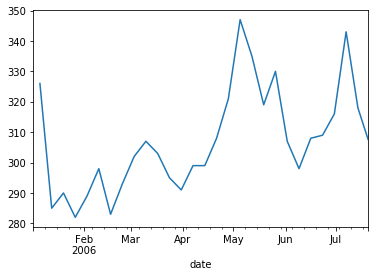

In [23]:
df['INJCJCIndex'].interpolate()[0:200].plot()

In [24]:
df['INJCJCIndex'].interpolate()[0:200]

date
2006-01-02           NaN
2006-01-03           NaN
2006-01-04           NaN
2006-01-05           NaN
2006-01-06    326.000000
                 ...    
2006-07-16    314.571429
2006-07-17    312.857143
2006-07-18    311.142857
2006-07-19    309.428571
2006-07-20    307.714286
Name: INJCJCIndex, Length: 200, dtype: float64

In [25]:
df.isna().sum().sum()

671134

In [26]:
df.interpolate().isna().sum().sum()

5812

In [27]:
df = df.interpolate()

근데 사잇값이 없는 경우는 어쩔 수 없이 bfill을 해야겠다.

In [28]:
df = df.fillna(method = 'bfill')

In [29]:
df.interpolate().isna().sum().sum()

0

In [30]:
df['INJCJCIndex'].interpolate()[0:40]

date
2006-01-02    326.000000
2006-01-03    326.000000
2006-01-04    326.000000
2006-01-05    326.000000
2006-01-06    326.000000
2006-01-07    320.142857
2006-01-08    314.285714
2006-01-09    308.428571
2006-01-10    302.571429
2006-01-11    296.714286
2006-01-12    290.857143
2006-01-13    285.000000
2006-01-14    285.714286
2006-01-15    286.428571
2006-01-16    287.142857
2006-01-17    287.857143
2006-01-18    288.571429
2006-01-19    289.285714
2006-01-20    290.000000
2006-01-21    288.857143
2006-01-22    287.714286
2006-01-23    286.571429
2006-01-24    285.428571
2006-01-25    284.285714
2006-01-26    283.142857
2006-01-27    282.000000
2006-01-28    283.000000
2006-01-29    284.000000
2006-01-30    285.000000
2006-01-31    286.000000
2006-02-01    287.000000
2006-02-02    288.000000
2006-02-03    289.000000
2006-02-04    290.285714
2006-02-05    291.571429
2006-02-06    292.857143
2006-02-07    294.142857
2006-02-08    295.428571
2006-02-09    296.714286
2006-02-10    298.00

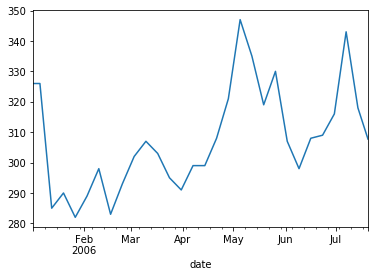

In [31]:
df['INJCJCIndex'].interpolate()[0:200].plot()

In [32]:
df.to_csv('bloomberg_for_linear_return.csv')

In [33]:
df.head()

,index,KRX_change,FDTRIndex_x,FDTRIndex_y,USGG3MIndex,USGG10YRIndex,USTW$Index,INJCJCIndex,INJCSPIndex,USEMNCHGIndex,...,USCABALIndex,JNVNIYOYIndex,COSTNFR%Index,KOGNICNYIndex,KODFTOTYIndex,KOGNICUYIndex,EHCAUSIndex,KOGCGDPYIndex,PRODNFR%Index,KOGCSTOQIndex
date,,,,,,,,,,,,,,,,,,,,,
2006-01-02,0,0.33,4.25,4.25,4.0736,4.3911,86.0274,326.0,2561.0,398.0,...,-198.2,13.6,5.2,3.0,-0.7,5.2,-5.67,5.6,2.9,0.6
2006-01-03,1,0.33,4.25,4.25,4.1144,4.3637,85.0983,326.0,2561.0,398.0,...,-198.2,13.6,5.2,3.0,-0.7,5.2,-5.67,5.6,2.9,0.6
2006-01-04,2,0.33,4.25,4.25,4.1798,4.3422,84.5642,326.0,2561.0,398.0,...,-198.2,13.6,5.2,3.0,-0.7,5.2,-5.67,5.6,2.9,0.6
2006-01-05,3,0.33,4.25,4.25,4.1793,4.3519,84.7247,326.0,2561.0,398.0,...,-198.2,13.6,5.2,3.0,-0.7,5.2,-5.67,5.6,2.9,0.6
2006-01-06,4,0.33,4.25,4.25,4.1985,4.3733,84.3844,326.0,2561.0,398.0,...,-198.2,13.6,5.2,3.0,-0.7,5.2,-5.67,5.6,2.9,0.6


In [35]:
df.drop('index', axis = 1, inplace = True)

In [36]:
df.reset_index(inplace = True)

In [37]:
date = df['date']

In [38]:
df.drop('date', axis = 1, inplace = True)

In [39]:
y_target = df['KRX_change']

In [40]:
X_data = df.drop('KRX_change', axis = 1, inplace = False)

In [49]:
X_data.head()

,FDTRIndex_x,FDTRIndex_y,USGG3MIndex,USGG10YRIndex,USTW$Index,INJCJCIndex,INJCSPIndex,USEMNCHGIndex,NFPPCHIndex,NFPTCHIndex,...,USCABALIndex,JNVNIYOYIndex,COSTNFR%Index,KOGNICNYIndex,KODFTOTYIndex,KOGNICUYIndex,EHCAUSIndex,KOGCGDPYIndex,PRODNFR%Index,KOGCSTOQIndex
0,4.25,4.25,4.0736,4.3911,86.0274,326.0,2561.0,398.0,310.0,278.0,...,-198.2,13.6,5.2,3.0,-0.7,5.2,-5.67,5.6,2.9,0.6
1,4.25,4.25,4.1144,4.3637,85.0983,326.0,2561.0,398.0,310.0,278.0,...,-198.2,13.6,5.2,3.0,-0.7,5.2,-5.67,5.6,2.9,0.6
2,4.25,4.25,4.1798,4.3422,84.5642,326.0,2561.0,398.0,310.0,278.0,...,-198.2,13.6,5.2,3.0,-0.7,5.2,-5.67,5.6,2.9,0.6
3,4.25,4.25,4.1793,4.3519,84.7247,326.0,2561.0,398.0,310.0,278.0,...,-198.2,13.6,5.2,3.0,-0.7,5.2,-5.67,5.6,2.9,0.6
4,4.25,4.25,4.1985,4.3733,84.3844,326.0,2561.0,398.0,310.0,278.0,...,-198.2,13.6,5.2,3.0,-0.7,5.2,-5.67,5.6,2.9,0.6


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

In [51]:
lr = LinearRegression()

In [52]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [54]:
print('MSE: {0: .3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance Score : {0:3f}'.format(r2_score(y_test, y_pred)))

MSE:  2.743, RMSE : 1.656
Variance Score : -0.011089


In [55]:
# intercept, coefficients 확인
print('절편 값 :', lr.intercept_)
print('회귀 계수 값 :', np.round(lr.coef_, 1))

절편 값 : 129.78237529762197
회귀 계수 값 : [-1.20126344e+09  1.20126344e+09 -5.00000000e-01  2.20000000e+00
 -2.00000000e-01 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -2.00000000e-01  0.00000000e+00 -4.00000000e-01
 -5.00000000e-01 -1.00000000e-01 -3.00000000e-01  2.00000000e-01
  1.00000000e-01  1.20000000e+00  0.00000000e+00  7.00000000e-01
  1.00000000e-01  1.30000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  2.50000000e+00 -1.00000000e-01
 -1.00000000e-01  2.00000000e-01  1.60000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -1.00000000e-01  1.00000000e-01  5.00000000e-01
 -6.00000000e-01  1.00000000e-01  3.00000000e-01 -1.00000000e-01
 -3.00000000e-01  1.00000000e-01  1.00000000e-01 -1.00000000e-01
 -1.00000000e-01 -0.00000000e+00  1.00000000e-01 -1.00000000e-01
 -1.20000000e+00 -1.00000000e-01 -4.00000000e-01  3.00

In [56]:
# 피쳐별 회귀 계수 값으로 정렬
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

FDTRIndex_y      1.201263e+09
MGT2REIndex      1.320000e+01
KOECPRCYIndex    2.700000e+00
USWHTOTIndex     2.500000e+00
KOECSPRQIndex    2.500000e+00
                     ...     
KOECFCSYIndex   -3.400000e+00
KOECFCOYIndex   -4.200000e+00
EHCAUSIndex     -4.900000e+00
MGT2TBIndex     -2.110000e+01
FDTRIndex_x     -1.201263e+09
Length: 140, dtype: float64

Standard Scaler를 써서 다시 해보기

In [70]:
y_target = df['KRX_change']

In [71]:
X_data = df.drop('KRX_change', axis = 1, inplace = False)

In [72]:
col_name = X_data.columns

In [73]:
X_data = StandardScaler().fit_transform(X_data)

In [76]:
#X_data = MinMaxScaler().fit_transform(X_data)

In [77]:
X_data = pd.DataFrame(X_data, columns = col_name)

In [78]:
X_data.head()

,FDTRIndex_x,FDTRIndex_y,USGG3MIndex,USGG10YRIndex,USTW$Index,INJCJCIndex,INJCSPIndex,USEMNCHGIndex,NFPPCHIndex,NFPTCHIndex,...,USCABALIndex,JNVNIYOYIndex,COSTNFR%Index,KOGNICNYIndex,KODFTOTYIndex,KOGNICUYIndex,EHCAUSIndex,KOGCGDPYIndex,PRODNFR%Index,KOGCSTOQIndex
0,0.8,0.8,0.788812,0.770846,0.624331,0.28178,0.182912,0.748031,0.954855,0.808527,...,0.125339,0.891156,0.715385,0.489362,0.0,0.394231,0.066998,0.463158,0.544715,0.491803
1,0.8,0.8,0.796634,0.763882,0.592130,0.28178,0.182912,0.748031,0.954855,0.808527,...,0.125339,0.891156,0.715385,0.489362,0.0,0.394231,0.066998,0.463158,0.544715,0.491803
2,0.8,0.8,0.809171,0.758418,0.573619,0.28178,0.182912,0.748031,0.954855,0.808527,...,0.125339,0.891156,0.715385,0.489362,0.0,0.394231,0.066998,0.463158,0.544715,0.491803
3,0.8,0.8,0.809076,0.760883,0.579181,0.28178,0.182912,0.748031,0.954855,0.808527,...,0.125339,0.891156,0.715385,0.489362,0.0,0.394231,0.066998,0.463158,0.544715,0.491803
4,0.8,0.8,0.812756,0.766322,0.567387,0.28178,0.182912,0.748031,0.954855,0.808527,...,0.125339,0.891156,0.715385,0.489362,0.0,0.394231,0.066998,0.463158,0.544715,0.491803


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

In [80]:
lr = LinearRegression()

In [81]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [85]:
print('MSE: {0: .3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance Score : {0:3f}'.format(r2_score(y_test, y_pred)))

MSE:  2.744, RMSE : 1.656
Variance Score : -0.011145


In [86]:
# intercept, coefficients 확인
print('절편 값 :', lr.intercept_)
print('회귀 계수 값 :', np.round(lr.coef_, 1))

절편 값 : 3.2670662058703717
회귀 계수 값 : [ -0.   -0.   -2.6   8.5  -5.4  -1.   -3.5   1.3  -1.8   3.5   0.2   1.2
  -3.8 -14.1   2.2  -0.7  -0.7  -0.1  -1.9   1.2   0.4   7.6   0.9   6.3
   4.   34.9   0.3   0.4  -0.3  -0.4   2.3  -1.7  -4.2   7.8   8.4   3.5
  -2.9   5.8 -53.7 -19.3   1.3  -7.9   5.   31.  -40.9   6.5   8.5  -1.8
  -6.3   2.    1.9  -1.2  -1.2  -0.7   2.   -1.3  -5.3  -0.8  -2.4   2.8
   3.    1.4 -11.6   2.4  -5.1   0.2   1.5  -5.4  -2.6   9.4  -0.9   1.7
  -1.6  -0.9 -38.5  42.2 -11.5  23.2  31.4  -5.2 -10.3  -7.9 -25.6  30.7
   3.2   9.5  -5.8 -16.3   1.6  -3.5  -0.4  -4.1   3.6  -1.2  -1.9   0.3
   0.3   0.3  -1.3  -1.4   0.7  -1.4   0.5   3.1  -5.1   3.7   7.1   2.3
   0.5   2.1  -2.3   4.9  -5.8   4.8  29.6  18.  -18.3 -34.1  -0.5   6.5
  -0.2  -7.3   9.1   3.1 -19.8   2.9   4.7  -1.8   1.2  24.7  -3.   -0.8
   3.8  -6.2  -1.7   2.8 -19.9   6.8  -0.2  -0.7]


In [110]:
# 피쳐별 회귀 계수 값으로 정렬
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

KOECPRCYIndex    1298.9
SKLILCIndex      1214.8
SKLILIIndex      1152.6
OEUSKLARIndex    1050.7
KOIPMSIndex       548.6
                  ...  
CPTICHNGIndex    -459.3
KOECFCSYIndex    -523.5
PIDSPINXIndex    -865.6
KOECFCOYIndex   -1104.6
GDPCUR$Index    -2756.4
Length: 140, dtype: float64

In [138]:
ridge = Ridge(alpha = 10)
ridge.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [139]:
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MSE: {0: .3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance Score : {0:3f}'.format(r2_score(y_test, y_pred)))

MSE:  2715.175, RMSE : 52.107
Variance Score : 0.988215


In [141]:
lasso = Lasso(alpha = 10)
lasso.fit(X_train, y_train)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [142]:
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MSE: {0: .3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance Score : {0:3f}'.format(r2_score(y_test, y_pred)))

MSE:  9905.658, RMSE : 99.527
Variance Score : 0.957006


In [111]:
# Ridge regression, alpha = 10
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [112]:
print(' 5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
print(' 5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print(' 5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 folds의 개별 Negative MSE scores :  [ -34865.031 -135292.482 -166810.408 -117224.669 -150615.07 ]
 5 folds의 개별 RMSE scores :  [186.722 367.821 408.424 342.381 388.092]
 5 folds의 평균 RMSE : 338.688


In [113]:
# alpha 값 변경에 따른 RMSE 체크
alphas = [0, 0.1, 1, 10, 100]

# alpha list 값 변경해가며 평균 RMSE 측정
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    # cross validation score를 이용해서 5 fold 의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}일 때 5 fold의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

/Users/mokpolar/opt/anaconda3/envs/tf-py36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.04759e-19): result may not be accurate.
  overwrite_a=True).T
/Users/mokpolar/opt/anaconda3/envs/tf-py36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.24512e-18): result may not be accurate.
  overwrite_a=True).T


alpha 0일 때 5 fold의 평균 RMSE : 4357924299374.698
alpha 0.1일 때 5 fold의 평균 RMSE : 585.229
alpha 1일 때 5 fold의 평균 RMSE : 487.247
alpha 10일 때 5 fold의 평균 RMSE : 338.688
alpha 100일 때 5 fold의 평균 RMSE : 343.372


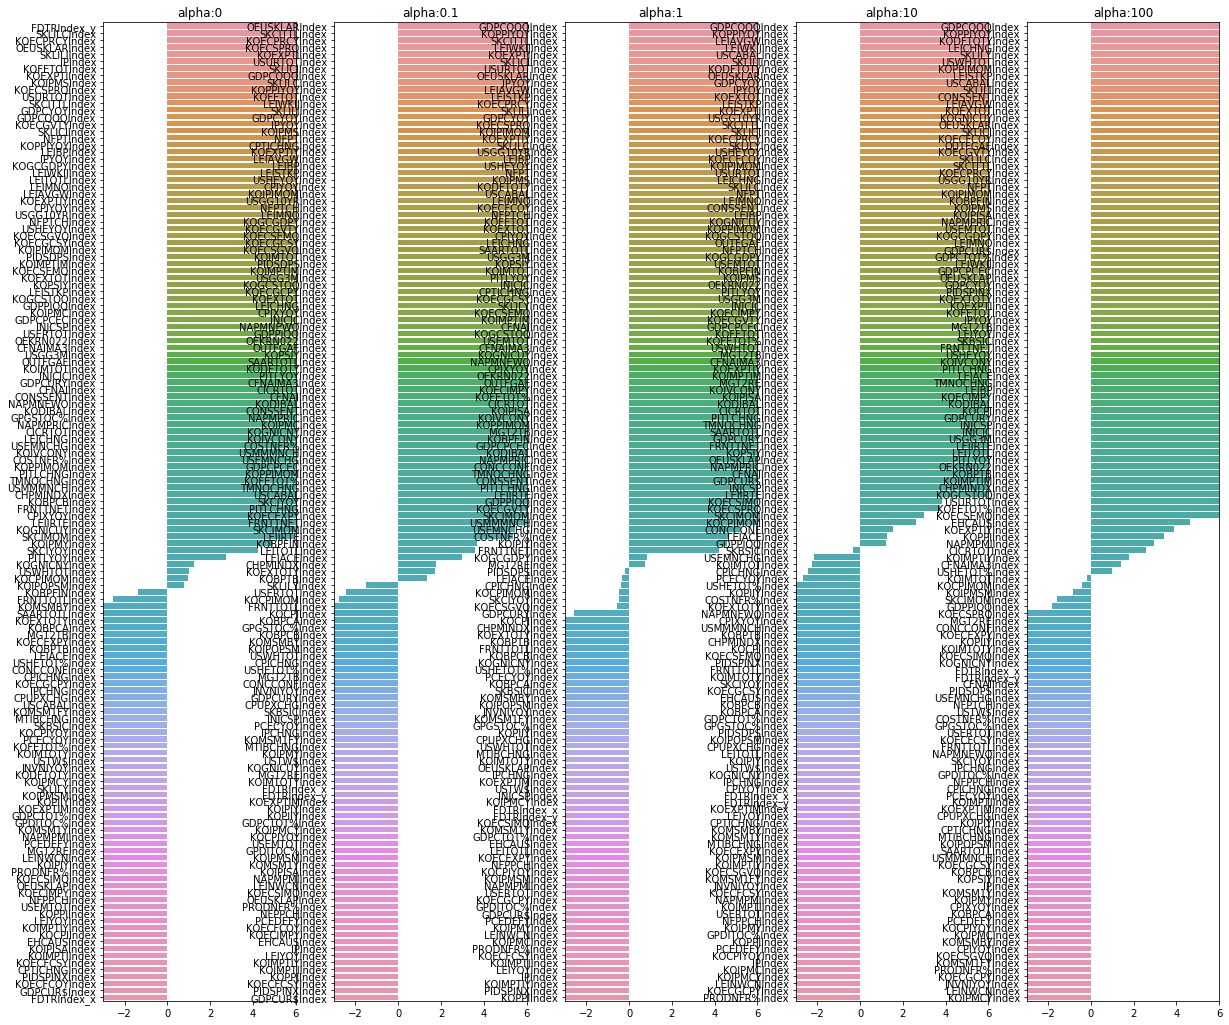

In [114]:
# alpha 값의 변화에 따른 피쳐의 회귀 계수값을 시각화
# 5열 matplotlib 축 생성
fig, axs = plt.subplots(figsize = (20, 18), nrows = 1, ncols = 5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 
coeff_df = pd.DataFrame()

# alpha 리스트 값을 차례로 입력해 회귀계수 값 시각화 및 데이터 저장
# pos는 axis 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    # alpha 에 따른 피쳐별로 회귀 계수를 Series로 변환하고 이를 DataFrame 컬럼으로 추가
    coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. sorting
    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])

plt.show()
    

In [115]:
# alpha값을 증가시킬 수록 회귀 계쑤값이 작아지는 것 확인
# DataFrame에 저장된 alpha값의 변화에 따른 Ridge 회귀계수값 확인
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
FDTRIndex_y,6.235107e+14,-57.046172,-54.350772,-27.673721,-7.533072
SKLILCIndex,1.653299e+03,290.037722,99.968916,44.876057,24.753528
KOECPRCYIndex,1.421160e+03,423.582415,153.553448,59.800085,22.982109
OEUSKLARIndex,1.034428e+03,592.192225,177.616426,68.065669,33.584179
SKLILIIndex,9.374943e+02,249.862716,145.203523,75.119379,38.660476
...,...,...,...,...,...
CPTICHNGIndex,-6.304479e+02,150.670536,35.456923,-29.981143,-20.790613
PIDSPINXIndex,-7.470571e+02,-553.619667,-202.848935,-10.325328,16.911871
KOECFCOYIndex,-1.214576e+03,-162.258601,58.199476,54.419129,27.569720
GDPCUR$Index,-3.069548e+03,-585.151422,-107.913994,7.564465,18.218524


In [116]:
coeff_df['alpha:100'].sort_values(ascending = False)

GDPCQOQIndex     69.039559
KOPPIYOYIndex    60.183941
KODFTOTYIndex    51.308125
LEICHNGIndex     50.421606
SKLILYIndex      47.694632
                   ...    
PRODNFR%Index   -37.226644
KOECGCPYIndex   -37.379411
JNVNIYOYIndex   -38.523854
LEINWCNIndex    -50.230455
KOIPMCYIndex    -98.504745
Name: alpha:100, Length: 140, dtype: float64

In [117]:
coeff_df[coeff_df['alpha:100'] > 0]['alpha:100'].sort_values(ascending = False)

GDPCQOQIndex     69.039559
KOPPIYOYIndex    60.183941
KODFTOTYIndex    51.308125
LEICHNGIndex     50.421606
SKLILYIndex      47.694632
                   ...    
NAPMPMIIndex      2.948283
CICRTOTIndex      2.590004
KOIMPTIYIndex     1.771330
CFNAIMA3Index     1.394504
USHETOT%Index     0.975507
Name: alpha:100, Length: 79, dtype: float64

In [118]:
len(coeff_df[coeff_df['alpha:100'] > 0]['alpha:100'].sort_values(ascending = False))

79

그러니까 여기까지 정리하면 StandardScaler를 적용했을 때,  
일단 분석에 유의미한 영향을 주는 회귀 계수 0이상의 변수만 봤을 때 그 갯수는 65개임

In [119]:
a = coeff_df[coeff_df['alpha:100'] > 0]['alpha:100']

In [120]:
a = a.index

In [121]:
a = list(a)

In [122]:
a

['USGG3MIndex',
 'USGG10YRIndex',
 'INJCJCIndex',
 'INJCSPIndex',
 'OUTFGAFIndex',
 'KOFETOT%Index',
 'KOEXTOTYIndex',
 'USHETOT%Index',
 'USHEYOYIndex',
 'USURTOTIndex',
 'KOFETOTIndex',
 'NAPMPRICIndex',
 'KOCPIIndex',
 'SKCITTLIndex',
 'CHPMINDXIndex',
 'USWHTOTIndex',
 'NAPMPMIIndex',
 'SKBSICIndex',
 'CONSSENTIndex',
 'LEIWKIJIndex',
 'KOEXTOTIndex',
 'NFPTIndex',
 'USEMTOTIndex',
 'KOIVCONYIndex',
 'KOEXPTIYIndex',
 'KOIMPTIYIndex',
 'LEIYOYIndex',
 'IPYOYIndex',
 'KOIPIMOMIndex',
 'TMNOCHNGIndex',
 'KOIMPTIMIndex',
 'LEIIRTEIndex',
 'PITLYOYIndex',
 'PITLCHNGIndex',
 'KOPPIYOYIndex',
 'CFNAIMA3Index',
 'LEICHNGIndex',
 'LEIACEIndex',
 'SKLILYIndex',
 'KOPPIMOMIndex',
 'KOIPMSIndex',
 'KOIPISAIndex',
 'SKLILIIndex',
 'SKLILCIndex',
 'SKLICIIndex',
 'LEIAVGWIndex',
 'KOPPIIndex',
 'LEITOTLIndex',
 'KOEXPTIIndex',
 'LEISTKPIndex',
 'LEIBPIndex',
 'PIDSPINXIndex',
 'LEIMNOIndex',
 'KOBPFINIndex',
 'KOBPTBIndex',
 'KODIBALIndex',
 'FRNTTNETIndex',
 'CICRTOTIndex',
 'MGT2TBIndex',
 'O